<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.235658,44.894597,62.296045,37.460574,0.001148,248.888022,248.886486,0.001537
1,0.0,1.0,99.796956,61.694131,33.592017,70.534525,-0.000708,275.616921,275.617598,-0.000677
2,0.0,2.0,74.910739,20.540354,83.045059,35.061306,0.001684,223.559141,223.557011,0.002130
3,0.0,3.0,90.957667,61.423783,89.663998,73.300235,-0.000458,325.345225,325.345688,-0.000462
4,0.0,4.0,68.348319,34.956288,69.047703,55.752509,0.002907,238.107726,238.104590,0.003136
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,87.853232,61.341537,60.260296,60.466037,0.000200,279.921302,279.921293,0.000009
59996,999.0,56.0,45.607330,88.054815,55.804947,84.386691,0.000073,283.853857,283.853717,0.000140
59997,999.0,57.0,51.444281,32.168463,57.886940,55.681308,-0.000839,207.180154,207.181091,-0.000938
59998,999.0,58.0,66.283319,31.163881,74.353252,28.224836,0.000727,210.026015,210.025423,0.000592


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.235658  44.894597  62.296045  37.460574  0.001148  248.888022   
      1.0    99.796956  61.694131  33.592017  70.534525 -0.000708  275.616921   
      2.0    74.910739  20.540354  83.045059  35.061306  0.001684  223.559141   
      3.0    90.957667  61.423783  89.663998  73.300235 -0.000458  325.345225   
      4.0    68.348319  34.956288  69.047703  55.752509  0.002907  238.107726   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037  0.000200  279.921302   
      56.0   45.607330  88.054815  55.804947  84.386691  0.000073  283.853857   
      57.0   51.444281  32.168463  57.886940  55.681308 -0.000839  207.180154   
      58.0   66.283319  31.163881  74.353252  28.224836  0.000727  210.026015   
      59.0   98.015393  51.458453  53.224837  59.129841  0.000193  271.828717   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.886486  0.001537  
      1.0    275.617598 -0.000677  
      2.0    223.557011  0.002130  
      3.0    325.345688 -0.000462  
      4.0    238.104590  0.003136  
...                 ...       ...  
999.0 55.0   279.921293  0.000009  
      56.0   283.853717  0.000140  
      57.0   207.181091 -0.000938  
      58.0   210.025423  0.000592  
      59.0   271.828780 -0.000064  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.235658  44.894597  62.296045  37.460574  0.001148  248.888022   
      1.0    99.796956  61.694131  33.592017  70.534525 -0.000708  275.616921   
      2.0    74.910739  20.540354  83.045059  35.061306  0.001684  223.559141   
      3.0    90.957667  61.423783  89.663998  73.300235 -0.000458  325.345225   
      4.0    68.348319  34.956288  69.047703  55.752509  0.002907  238.107726   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037  0.000200  279.921302   
      56.0   45.607330  88.054815  55.804947  84.386691  0.000073  283.853857   
      57.0   51.444281  32.168463  57.886940  55.681308 -0.000839  207.180154   
      58.0   66.283319  31.163881  74.353252  28.224836  0.000727  210.026015   
      59.0   98.015393  51.458453  53.224837  59.129841  0.000193  271.828717   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.886486  0.001537  
      1.0    275.617598 -0.000677  
      2.0    223.557011  0.002130  
      3.0    325.345688 -0.000462  
      4.0    238.104590  0.003136  
...                 ...       ...  
999.0 55.0   279.921293  0.000009  
      56.0   283.853717  0.000140  
      57.0   207.181091 -0.000938  
      58.0   210.025423  0.000592  
      59.0   271.828780 -0.000064  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.235658,44.894597,62.296045,37.460574,0.001148,248.888022,248.886486,0.001537
1,0.0,1.0,99.796956,61.694131,33.592017,70.534525,-0.000708,275.616921,275.617598,-0.000677
2,0.0,2.0,74.910739,20.540354,83.045059,35.061306,0.001684,223.559141,223.557011,0.002130
3,0.0,3.0,90.957667,61.423783,89.663998,73.300235,-0.000458,325.345225,325.345688,-0.000462
4,0.0,4.0,68.348319,34.956288,69.047703,55.752509,0.002907,238.107726,238.104590,0.003136
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,87.853232,61.341537,60.260296,60.466037,0.000200,279.921302,279.921293,0.000009
59996,999.0,56.0,45.607330,88.054815,55.804947,84.386691,0.000073,283.853857,283.853717,0.000140
59997,999.0,57.0,51.444281,32.168463,57.886940,55.681308,-0.000839,207.180154,207.181091,-0.000938
59998,999.0,58.0,66.283319,31.163881,74.353252,28.224836,0.000727,210.026015,210.025423,0.000592


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.235658  44.894597  62.296045  37.460574  0.001148  248.888022   
      1.0    99.796956  61.694131  33.592017  70.534525 -0.000708  275.616921   
      2.0    74.910739  20.540354  83.045059  35.061306  0.001684  223.559141   
      3.0    90.957667  61.423783  89.663998  73.300235 -0.000458  325.345225   
      4.0    68.348319  34.956288  69.047703  55.752509  0.002907  238.107726   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037  0.000200  279.921302   
      56.0   45.607330  88.054815  55.804947  84.386691  0.000073  283.853857   
      57.0   51.444281  32.168463  57.886940  55.681308 -0.000839  207.180154   
      58.0   66.283319  31.163881  74.353252  28.224836  0.000727  210.026015   
      59.0   98.015393  51.458453  53.224837  59.129841  0.000193  271.828717   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.886486  0.001537  
      1.0    275.617598 -0.000677  
      2.0    223.557011  0.002130  
      3.0    325.345688 -0.000462  
      4.0    238.104590  0.003136  
...                 ...       ...  
999.0 55.0   279.921293  0.000009  
      56.0   283.853717  0.000140  
      57.0   207.181091 -0.000938  
      58.0   210.025423  0.000592  
      59.0   271.828780 -0.000064  

[60000 rows x 8 columns]

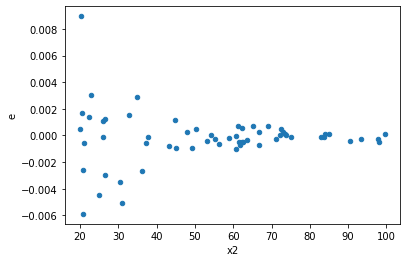

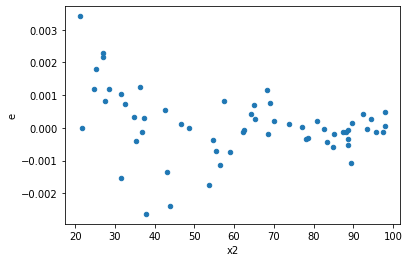

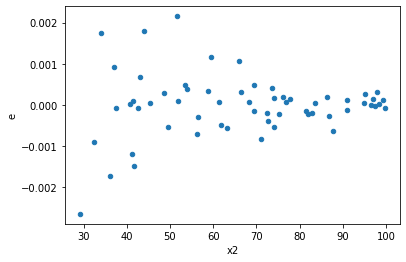

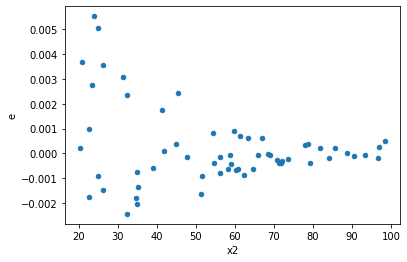

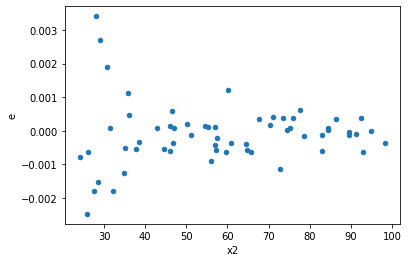

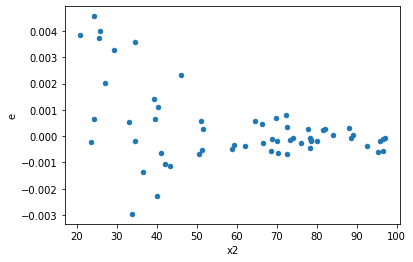

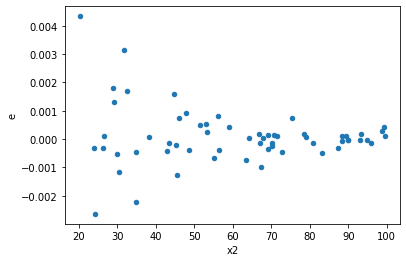

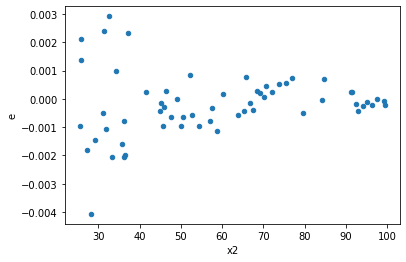

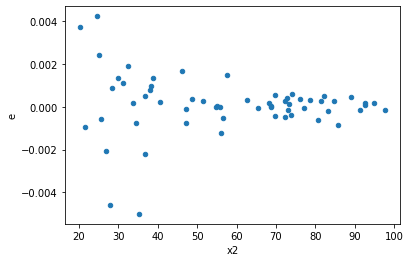

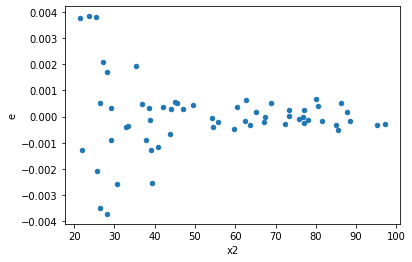

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,29.0,23.0,6.6740884224680525e-06,3.625583573411012e-05,2.3014098008510527e-07,1.5763406840917445e-06,6.84945672651963,1.2344989995582978e-05,0.9999938275050022,6.172494997791489e-06,Reject001=0 : Heteroscedasticity
2.0,30.0,22.0,7.283856946246272e-06,2.2388293013576747e-05,2.427952315415424e-07,1.0176496824353068e-06,4.191390728615633,0.0009276805072906402,0.9995361597463547,0.0004638402536453201,Reject001=0 : Heteroscedasticity
4.0,28.0,24.0,1.4901171669418344e-05,2.5876267748981414e-05,5.321847024792265e-07,1.0781778228742256e-06,2.025946664478413,0.08284948471116937,0.9585752576444153,0.04142474235558469,Reject001=1 : Homoscedasticity
5.0,28.0,24.0,4.244972310294608e-05,3.94773363176442e-05,1.5160615393909314e-06,1.644889013235175e-06,1.0849750953355095,0.845438556253943,0.5772807218730285,0.4227192781269715,Reject001=1 : Homoscedasticity
6.0,28.0,24.0,2.6383692296665735e-05,2.9724596548928974e-05,9.422747248809191e-07,1.238524856205374e-06,1.314398893976376,0.4998790690767474,0.7500604654616263,0.2499395345383737,Reject001=1 : Homoscedasticity
11.0,27.0,25.0,3.1131299787985018e-06,4.663812444416313e-05,1.1530111032587043e-07,1.865524977766525e-06,16.17959248175559,8.217773128649242e-10,0.9999999995891113,4.108886564324621e-10,Reject001=0 : Heteroscedasticity
12.0,21.0,31.0,3.915590439973312e-05,9.542825050537146e-05,1.8645668761777677e-06,3.0783306614635955e-06,1.650962859414278,0.19997415245253958,0.9000129237737302,0.09998707622626979,Reject001=1 : Homoscedasticity
13.0,25.0,27.0,9.80031667789646e-06,7.209026880208191e-05,3.920126671158584e-07,2.6700099556326634e-06,6.81102979471719,4.50759008563395e-06,0.9999977462049572,2.253795042816975e-06,Reject001=0 : Heteroscedasticity
15.0,23.0,29.0,6.243429663137899e-06,5.0839504797947094e-05,2.7145346361469125e-07,1.7530863723430033e-06,6.458147002432004,5.3493926495118416e-06,0.9999973253036752,2.6746963247559208e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,25.0,27.0,0.00016007656238227905,5.457359570611804e-05,6.403062495291162e-06,2.0212442854117794e-06,0.31566836758163935,0.0049408085448347395,Reject001=0 : Heteroscedasticity
1.0,29.0,23.0,6.6740884224680525e-06,3.625583573411012e-05,2.3014098008510527e-07,1.5763406840917445e-06,6.84945672651963,1.2344989995582978e-05,Reject001=0 : Heteroscedasticity
2.0,30.0,22.0,7.283856946246272e-06,2.2388293013576747e-05,2.427952315415424e-07,1.0176496824353068e-06,4.191390728615633,0.0009276805072906402,Reject001=0 : Heteroscedasticity
3.0,35.0,17.0,8.092388380698997e-05,1.2647641968811466e-05,2.312110965913999e-06,7.43978939341851e-07,0.3217747548927649,0.00444131479241442,Reject001=0 : Heteroscedasticity
4.0,28.0,24.0,1.4901171669418344e-05,2.5876267748981414e-05,5.321847024792265e-07,1.0781778228742256e-06,2.025946664478413,0.08284948471116937,Reject001=1 : Homoscedasticity
5.0,28.0,24.0,4.244972310294608e-05,3.94773363176442e-05,1.5160615393909314e-06,1.644889013235175e-06,1.0849750953355095,0.845438556253943,Reject001=1 : Homoscedasticity
6.0,28.0,24.0,2.6383692296665735e-05,2.9724596548928974e-05,9.422747248809191e-07,1.238524856205374e-06,1.314398893976376,0.4998790690767474,Reject001=1 : Homoscedasticity
7.0,31.0,21.0,4.8540628808983106e-05,1.608379394948309e-05,1.5658267357736486e-06,7.658949499753853e-07,0.4891313530912279,0.0687830156546373,Reject001=1 : Homoscedasticity
8.0,32.0,20.0,8.319273238097695e-05,1.2309685732622561e-05,2.5997728869055297e-06,6.154842866311281e-07,0.23674540562030774,0.00029615851349916325,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    562
Reject001=1 : Homoscedasticity      438
Name: Result_test, dtype: int64